# Bibliotecas

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import time

# Constantes

In [ ]:
STEP = 3

# Funções

In [ ]:
def plot_curve_with_estimatives(f, estimatives, start, end):
    root = estimatives[-1]

    y_est = [f(est_i) for est_i in estimatives]
    plt.scatter(estimatives[0:iterations-1], y_est[0:iterations-1], color='red', label='Estimativa')
    plt.scatter(root, f(root), color='black', label='Raiz')

    x = np.linspace(start, end, 1000)
    y = [f(x_i) for x_i in x]

    plt.plot(x, y, label=f'{f.__name__}(x)')
    plt.xlabel('x')
    plt.ylabel(f'{f.__name__}(x)')
    plt.title("Aproximação da Raiz")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_estimatives(estimatives):
    x = [i for i in range(len(estimatives))]

    plt.plot(x, estimatives, marker='o')
    plt.grid(True)
    plt.xlabel('Iteração')
    plt.ylabel('Estimativa da Raiz')
    plt.title('Estimativas')
    plt.legend()
    plt.show()

def make_comparation_table(estimatives, timers):
    comp_table = dict()

    for method, est in estimatives.items():
        comp_table[method] = [
            estimatives[method][0],
            estimatives[method][-1],
            func(estimatives[method][-1]),
            len(estimatives[method]),
            timers[method],
        ]

    return comp_table

# Métodos

In [ ]:
def bisection_method(f, start: float, end: float, precision=0.001, iter=100) -> list[float]:
    if f(start) * f(end) > 0:
        raise ValueError("Intervalo aparentemente sem raiz.")

    estimatives = []

    for i in range(iter):
        x = (start + end)/2
        f_x = f(x)
        estimatives.append(x)

        if abs(end - start) < precision:
            break

        m = f(start)
        if m*f_x > 0:
            start = x
            continue
        end = x

        if i == iter - 1:
            print("Não foi possível convergir!")

    return estimatives

def false_position_method(f, start: float, end: float, precision=0.001, iter=100) -> list[float]:
    if f(start) * f(end) > 0:
        raise ValueError("Intervalo aparentemente sem raiz.")

    if abs(end - start) < precision:
        return [random.uniform(start, end)]

    if abs(f(start)) < precision:
        return [start]

    if abs(f(end)) < precision:
        return [end]

    estimatives = []

    for i in range(iter):
        f_start = f(start)
        f_end = f(end)
        x = (start * f_end - end * f_start) / (f_end - f_start)

        f_x = f(x)
        estimatives.append(x)

        if (end - start) < precision:
            break

        if abs(f_x) < precision:
            break

        if f_start * f_x > 0:
            start = x
            continue
        end = x

        if i == iter - 1:
            print("Não foi possível convergir!")

    return estimatives

def newton_raphson_method(f, df, initial_guess: float, precision=0.001, iter=100):
    if abs(f(initial_guess)) < precision:
        return [initial_guess]

    previous_estimative = initial_guess
    estimatives = [initial_guess]
    for i in range(iter):
        x = previous_estimative - f(previous_estimative)/df(previous_estimative)
        f_x = f(x)
        estimatives.append(x)

        if (abs(f_x) < precision) or abs(x - previous_estimative) < precision:
            break

        previous_estimative = x

        if i == iter - 1:
            print("Não foi possível convergir!")

    return estimatives

def secant_method(f, x_a: float, x_b: float, precision=0.001, iter=100):
    if abs(f(x_a)) < precision:
        return [x_a]
    if abs(f(x_b)) < precision or abs(x_b - x_a) < precision:
        return [x_b]

    estimatives = []
    for i in range(iter):
        f_xa = f(x_a)
        f_xb = f(x_b)

        x = x_b - (f_xb/(f_xb-f_xa)) * (x_b - x_a)
        f_x = f(x)

        estimatives.append(x)
        if (abs(f_x) < precision) or (abs(x - x_b) < precision):
            break

        x_a = x_b
        x_b = x

        if i == iter - 1:
            print("Não foi possível convergir!")

    return estimatives

# Exercício 1

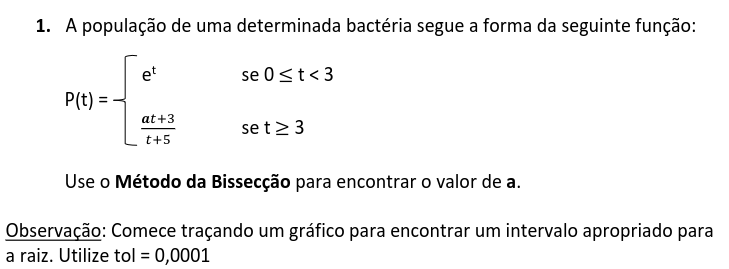


In [ ]:
def p(a: float):
    t = 3
    return (math.e ** t) - (t*a+3)/(t+5)

In [ ]:
START = 25
END = 75
tol = 0.0001

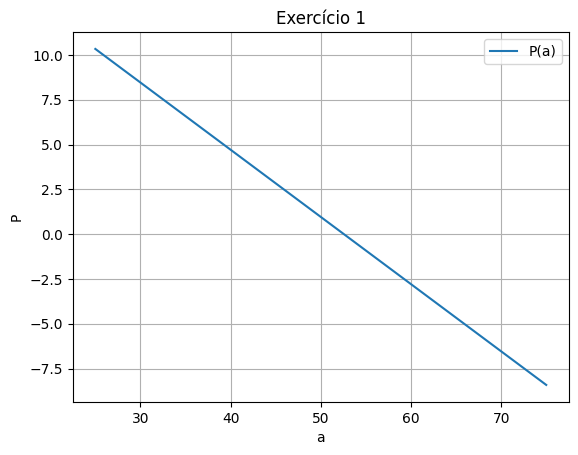

In [ ]:
x = np.linspace(START, END, 50)
y = [p(x_i) for x_i in x]

plt.plot(x, y, label='P(a)')
plt.xlabel('a')
plt.ylabel('P')
plt.title("Exercício 1")
plt.legend()
plt.grid(True)
plt.show()

Tendo em vista o gráfico, podemos observar que a raiz da função se encontra no intervalo [50, 60]



In [ ]:
estimatives = bisection_method(p, 50, 60, tol, 100)
root = estimatives[-1]
iterations = len(estimatives)
print(estimatives)

[55.0, 52.5, 53.75, 53.125, 52.8125, 52.65625, 52.578125, 52.5390625, 52.55859375, 52.568359375, 52.5634765625, 52.56103515625, 52.562255859375, 52.5616455078125, 52.56134033203125, 52.561492919921875, 52.56141662597656, 52.56145477294922]


In [ ]:
result = {'Resultado': [root, p(root), tol, iterations]}
pd.DataFrame(result, index=['x', 'f(x)', 'Tolerância', 'Iterações'])

,Resultado
x,52.561455
f(x),-0.000009
Tolerância,0.000100
Iterações,18.000000


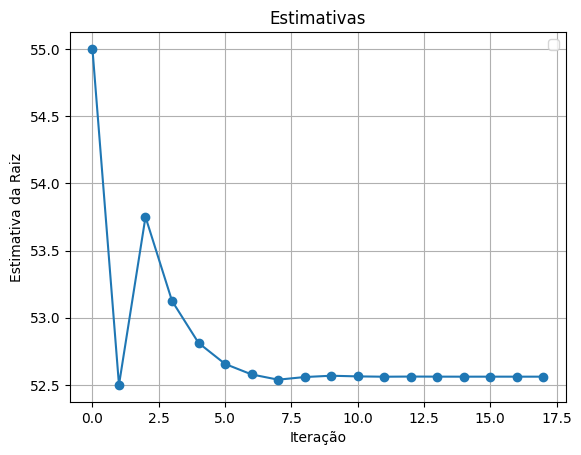

In [ ]:
plot_estimatives(estimatives)

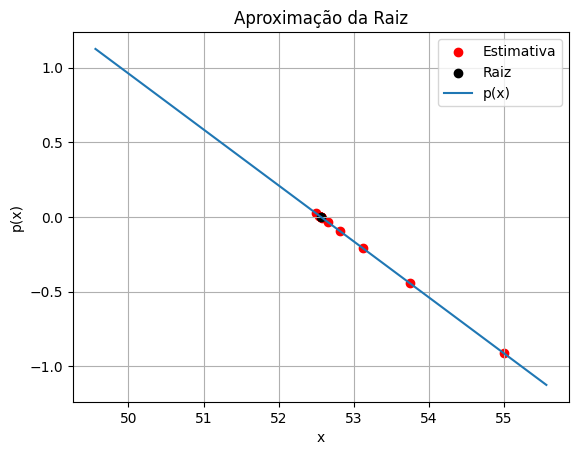

In [ ]:
plot_curve_with_estimatives(p, estimatives, root-STEP, root+STEP)

# Exercício 2

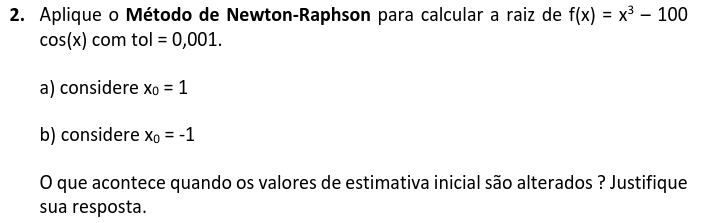

In [ ]:
def f(x: float):
    return (x ** 3) - 100*math.cos(x)

def df(x: float):
    return 3*(x ** 2) + 100*math.sin(x)

In [ ]:
x0_a = 1
x0_b = -1
tol = 0.001
START = -5
END = 5

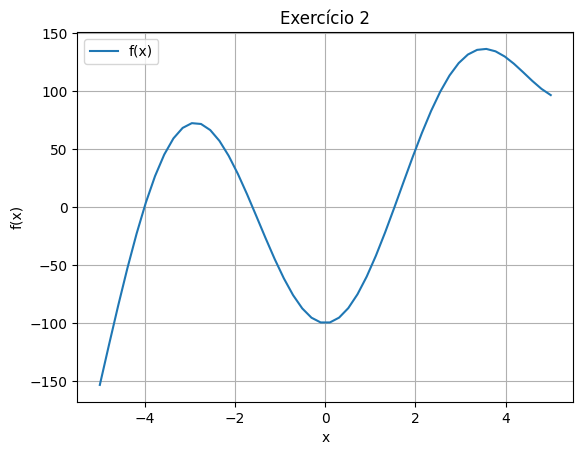

In [ ]:
x = np.linspace(START, END, 50)
y = [f(x_i) for x_i in x]

plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Exercício 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
estimatives = newton_raphson_method(f, df, x0_a, tol, 100)
root_a = estimatives[-1]
iterations = len(estimatives)
print(estimatives)

[1, 1.6085140126438489, 1.5348530464990653, 1.5346454577941748]


In [ ]:
result = {'Resultado': [root_a, f(root_a), tol, iterations]}
pd.DataFrame(result, index=['x', 'f(x)', 'Tolerância', 'Iterações'])

,Resultado
x,1.534645e+00
f(x),2.759933e-07
Tolerância,1.000000e-03
Iterações,4.000000e+00


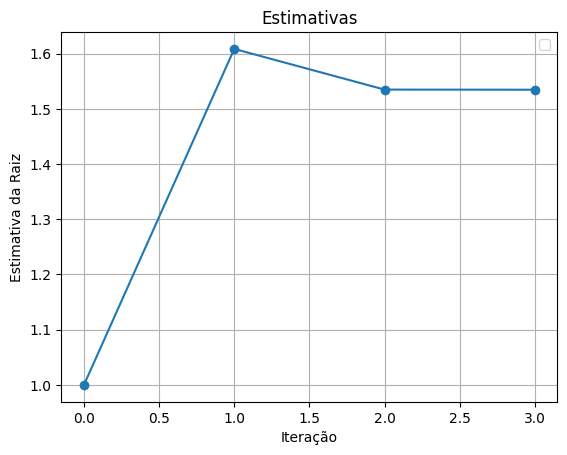

In [ ]:
plot_estimatives(estimatives)

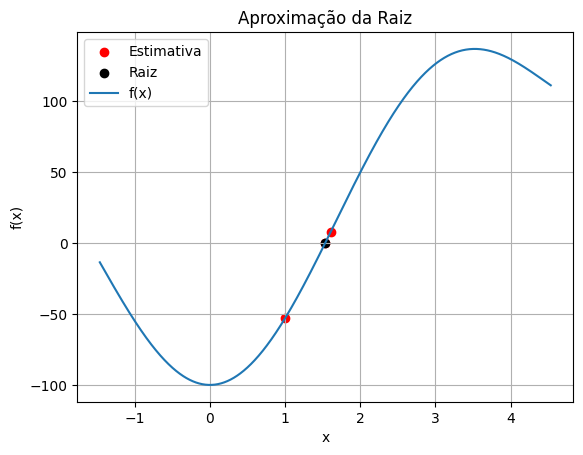

In [ ]:
plot_curve_with_estimatives(f, estimatives, root_a-STEP, root_a+STEP)

In [ ]:
estimatives = newton_raphson_method(f, df, x0_b, tol, 100)
root_b = estimatives[-1]
iterations = len(estimatives)
print(estimatives)

[-1, -1.6781540143402855, -1.612321697070812, -1.6127561270429593]


In [ ]:
result = {'Resultado': [root_b, f(root_b), tol, iterations]}
pd.DataFrame(result, index=['x', 'f(x)', 'Tolerância', 'Iterações'])

,Resultado
x,-1.612756
f(x),-0.000001
Tolerância,0.001000
Iterações,4.000000


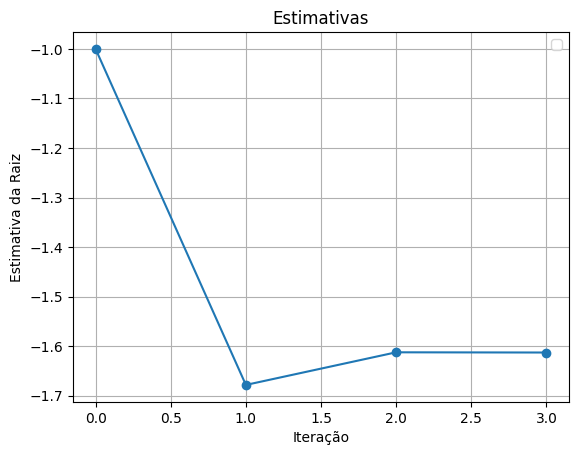

In [ ]:
plot_estimatives(estimatives)

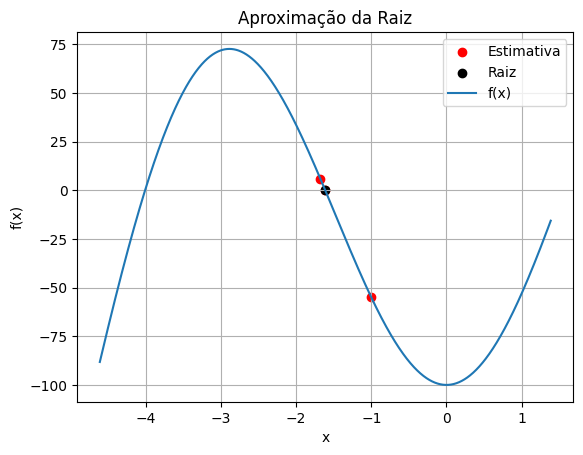

In [ ]:
plot_curve_with_estimatives(f, estimatives, root_b-STEP, root_b+STEP)

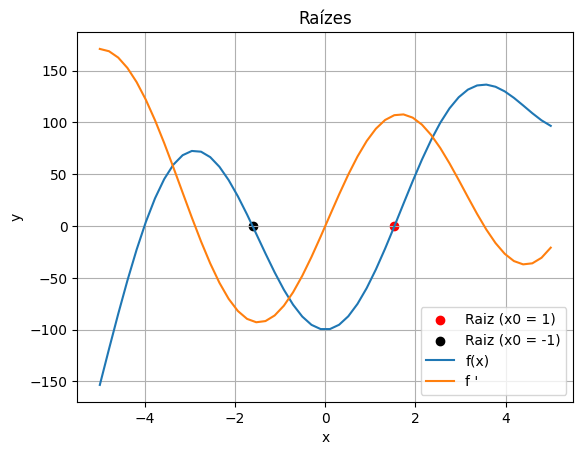

In [ ]:
plt.scatter(root_a, f(root_a), color='red', label='Raiz (x0 = 1)')
plt.scatter(root_b, f(root_b), color='black', label='Raiz (x0 = -1)')

x = np.linspace(START, END, 50)
y = [f(x_i) for x_i in x]
df_x = [df(x_i) for x_i in x]

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='f(x)')
plt.plot(x, df_x, label="f '")
plt.title('Raízes')
plt.legend()
plt.grid(True)
plt.show()

Através do gráfico, é notável que em cada caso o método de Newton-Raphson convergiu para uma raiz diferente.

Isso ocorre porque o método converge localmente para a raiz mais próxima do valor inicial estipulado. Entretanto, o método pode não convergir devido a diferenças muito grandes entre estimativas intermediárias, o que pode ser evitado estipulando um valor inicial próximo suficientemente da raiz da equação.

# Exercício 3

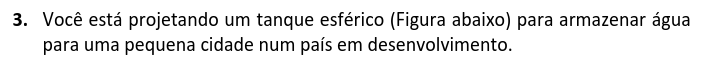
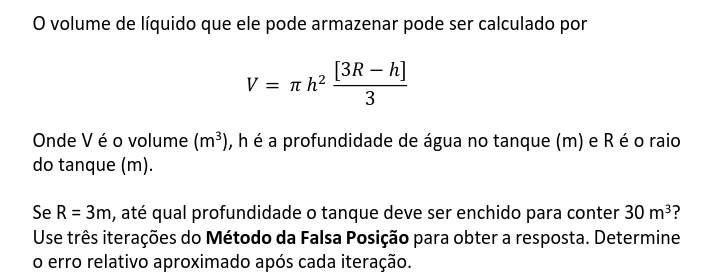

In [ ]:
def f(h: float):
    radius = 3
    volume = 30

    return ((math.pi * (h ** 2)) * (3 * radius - h)/3) - volume

In [ ]:
START = -5
END = 10
ITER = 3
tol = 0.0001

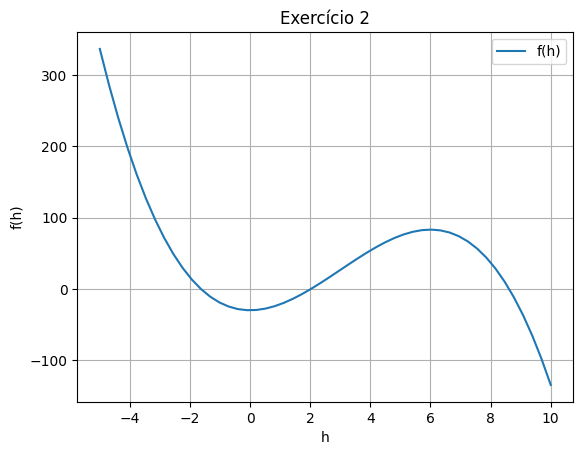

In [ ]:
x = np.linspace(START, END, 50)
y = [f(x_i) for x_i in x]

plt.plot(x, y, label='f(h)')
plt.xlabel('h')
plt.ylabel('f(h)')
plt.title("Exercício 2")
plt.legend()
plt.grid(True)
plt.show()

Observando o gráfico, percebemos que a função do volume possui 3 raízes, porém duas delas não condizem com o que se esperaria no mundo real.

A primeira seria a raiz negativa, pois não existe profundidade negativa.

A segunda seria a que se encontra após o ponto onde **h=6**, que é o diâmetro do tanque, logo, é impossível a profundidade ser maior do que 6. Além disso, a curva após **h=6** começa a decrescer, o que é irreal já que não há sentido o aumento da profundidade causar a diminuição do volume do tanque.

Portanto, o intervalo onde a raiz se encontra é entre 0 e 6m.

In [ ]:
estimatives = false_position_method(f, 1.5, 2.5, tol, ITER)
root = estimatives[-1]
iterations = len(estimatives)
print(estimatives)

[1.9957006213280488, 2.0254566487470047, 2.0268394389948714]


In [ ]:
result = {'Resultado': [root, f(root), tol, iterations]}
pd.DataFrame(result, index=['x', 'f(x)', 'Tolerância', 'Iterações'])

,Resultado
x,2.026839
f(x),-0.001677
Tolerância,0.000100
Iterações,3.000000


In [ ]:
abs_error = np.abs(np.array(estimatives) - root)
rel_error = abs_error / np.abs(estimatives)

In [ ]:
result = {'Estimativas': estimatives,
          'Erro Relativo': rel_error}
pd.DataFrame(result, index=[i+1 for i in range(iterations)])

,Estimativas,Erro Relativo
1,1.995701,0.015603
2,2.025457,0.000683
3,2.026839,0.000000


# Exercício 4

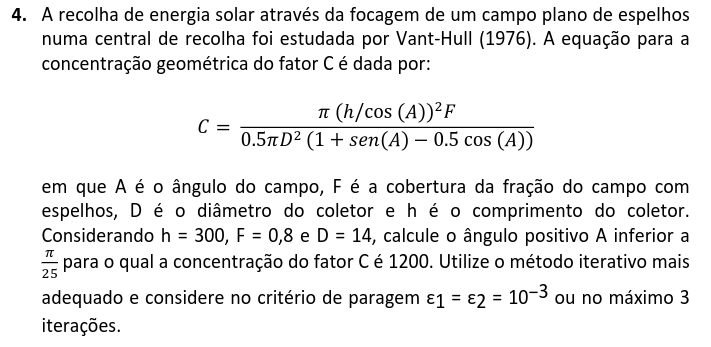

In [ ]:
def f(a: float):
    D = 14
    h = 300
    F = 0.8
    C = 1200

    numerator = (math.pi * ((h/math.cos(a)) ** 2) * F)
    denominator = 0.5 * math.pi * (D ** 2) * (1 + math.sin(a) - 0.5 * math.cos(a))

    return (numerator / denominator) - C

In [ ]:
tol = 1e-3
ITER = 3
START = 0
END = math.pi/25

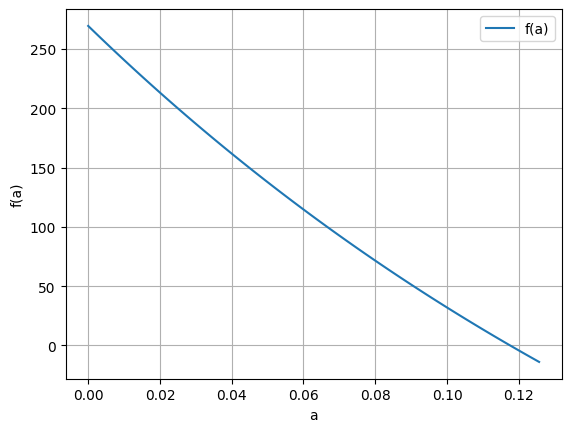

In [ ]:
x = np.linspace(START, END, 100)
y = [f(x_i) for x_i in x]

plt.plot(x, y, label='f(a)')
plt.xlabel('a')
plt.ylabel('f(a)')
plt.legend()
plt.grid(True)
plt.show()

Como o exercício exige um intervalo específico onde a raiz deva estar e sabendo o intervalo precisamente graças a plotagem do gráfico, o método selecionado foi o da Secante devido aos seus parâmetros de entrada (um intervalo), a ausência do cálculo de derivada, o qual seria custoso no caso do método de Newton-Raphson, e sua convergência a qual tende a ser mais rápida do que os métodos da Falsa Posição e de Bisseção.

In [ ]:
estimatives = secant_method(f, 0, END, tol, ITER)
root = estimatives[-1]
iterations = len(estimatives)
print(estimatives)

[0.11952114264777484, 0.1175749016090669, 0.11760920302195922]


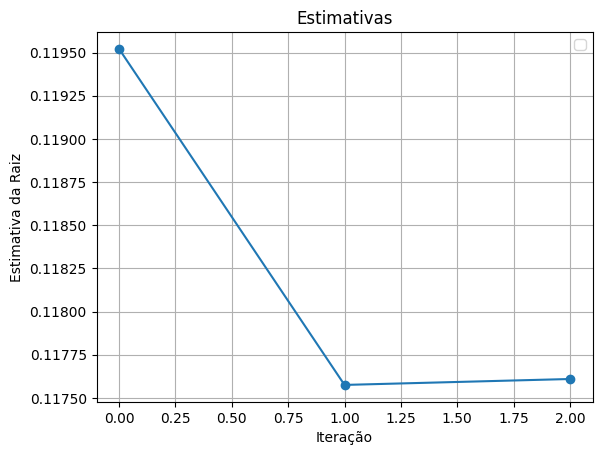

In [ ]:
plot_estimatives(estimatives)

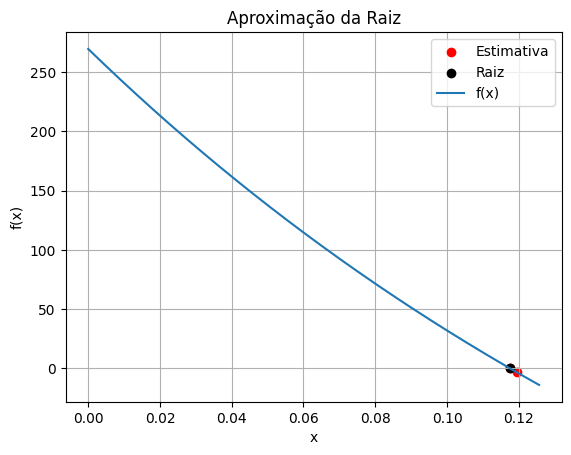

In [ ]:
plot_curve_with_estimatives(f, estimatives, START, END)

# Exercício 5

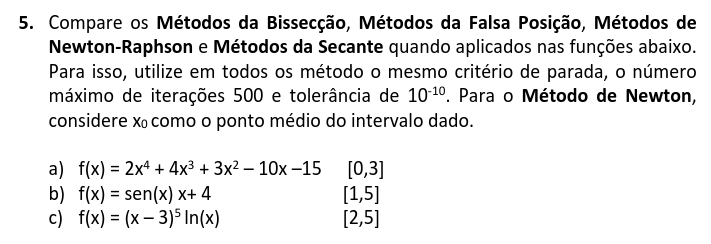

#### Questão A

In [ ]:
def func(x: float):
    return 2*(x ** 4) + 4*(x ** 3) + 3*(x ** 2) - 10*x - 15

def d_func(x: float):
    return 8*(x ** 3) + 12*(x ** 2) + 6*x -10

In [ ]:
tol = 1e-10
ITER = 500
START = -5
END = 5

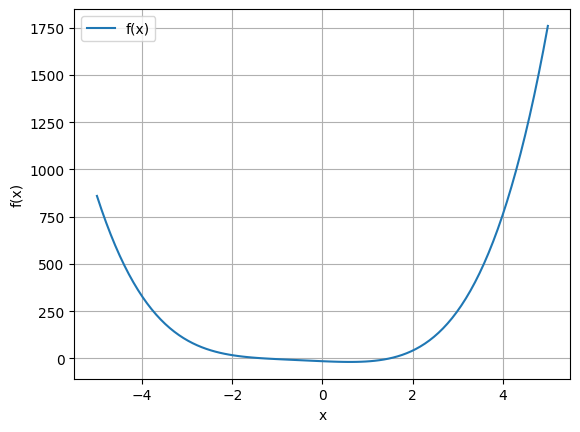

In [ ]:
x = np.linspace(START, END, 100)
y = [func(x_i) for x_i in x]

plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
estimatives = dict()
timers = dict()

start = time.perf_counter()
estimatives['Bisseção'] = bisection_method(func, 0, 3, tol, ITER)
timers['Bisseção'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Falsa Posição'] = false_position_method(func, 0, 3, tol, ITER)
timers['Falsa Posição'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Newton-Raphson'] = newton_raphson_method(func, d_func, 3/2, tol, ITER)
timers['Newton-Raphson'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Secante'] = secant_method(func, 0, 3, tol, ITER)
timers['Secante'] = time.perf_counter() - start

In [ ]:
comp_table = make_comparation_table(estimatives, timers)

In [ ]:
pd.DataFrame(comp_table, index=['Estimativa Inicial', 'x', 'f(x)','Nº de Iterações', 'Tempo de Execução'])

,Bisseção,Falsa Posição,Newton-Raphson,Secante
Estimativa Inicial,1.500000e+00,1.685393e-01,1.500000e+00,1.685393e-01
x,1.492879e+00,1.492879e+00,1.492879e+00,-1.300384e+00
f(x),-5.163692e-10,-7.024781e-11,1.776357e-15,-1.527489e-11
Nº de Iterações,3.600000e+01,7.800000e+01,4.000000e+00,1.000000e+01
Tempo de Execução,1.091300e-04,1.949800e-04,5.513000e-05,6.511000e-05


Como a raiz encontrada pelo método da Secante é diferente das demais devido ao comportamento de seu algoritmo, é difícil compará-lo com os demais, portanto será deixado de lado.

Olhando para o número de iterações fica óbvia a superioridade do método de Newton-Raphson em relação aos outros métodos que chegaram ao resultado com dezenas de iterações e sua f(x) mais próxima de 0. Isso acompanhado de seu tempo de execução baixo sugerem uma convergência mais rápida e um cálculo de derivada simples computacionalmente.

#### Questão B

In [ ]:
def func(x: float):
    return math.sin(x) * x + 4

def d_func(x: float):
    return math.sin(x) + x * math.cos(x)

In [ ]:
tol = 1e-10
ITER = 500
START = 0
END = 2 * math.pi

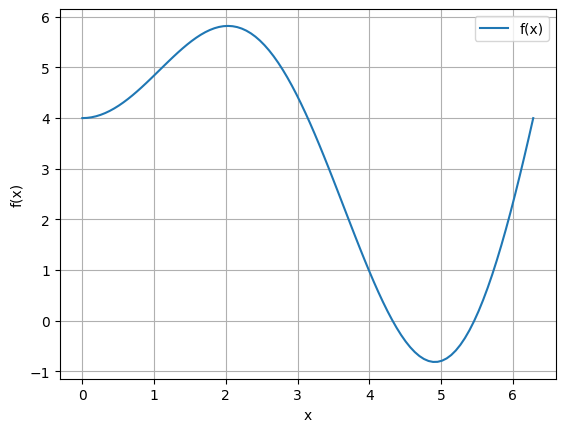

In [ ]:
x = np.linspace(START, END, 100)
y = [func(x_i) for x_i in x]

plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
estimatives = dict()
timers = dict()

start = time.perf_counter()
estimatives['Bisseção'] = bisection_method(func, 1, 5, tol, ITER)
timers['Bisseção'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Falsa Posição'] = false_position_method(func, 1, 5, tol, ITER)
timers['Falsa Posição'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Newton-Raphson'] = newton_raphson_method(func, d_func, 3, tol, ITER)
timers['Newton-Raphson'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Secante'] = secant_method(func, 1, 5, tol, ITER)
timers['Secante'] = time.perf_counter() - start

In [ ]:
comp_table = make_comparation_table(estimatives, timers)

In [ ]:
pd.DataFrame(comp_table, index=['Estimativa Inicial', 'x', 'f(x)','Nº de Iterações', 'Tempo de Execução'])

,Bisseção,Falsa Posição,Newton-Raphson,Secante
Estimativa Inicial,3.000000e+00,4.436048e+00,3.000000e+00,4.436048e+00
x,4.323240e+00,4.323240e+00,4.323240e+00,4.323240e+00
f(x),-6.011014e-11,-4.981615e-11,2.571054e-11,-7.194245e-14
Nº de Iterações,3.700000e+01,9.000000e+00,6.000000e+00,7.000000e+00
Tempo de Execução,1.584500e-04,6.616000e-05,5.923000e-05,5.887000e-05


Podemos perceber que o método da bisseção neste exemplo é de longe o pior deles devido ao seu elevado número de iterações e tempo gasto até a convergência. Enquanto isso, os outros obtiveram desempenhos semelhantes.

Portanto, o método da Secante é o melhor para esse exemplo, pois converge tão rápido quanto o de Newton-Raphson, pois é computacionalmente mais simples de ser executada devido à ausência do cálculo de derivada e o seu nº de iterações ainda é menor do que o da Falsa Posição.

#### Questão C

In [ ]:
def func(x: float):
    return ((x - 3) ** 5) * math.log(x)

def d_func(x: float):
    return ((5 * (x - 3) ** 4) * math.log(x)) + ((1/x) * ((x - 3) ** 5))

In [ ]:
tol = 1e-10
ITER = 500
START = 0.001
END = 5

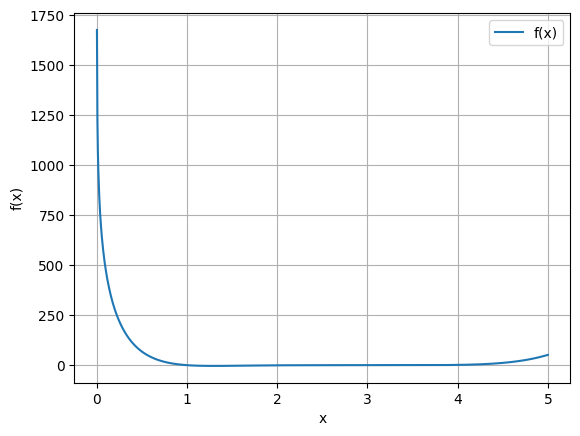

In [ ]:
x = np.linspace(START, END, 1000)
y = [func(x_i) for x_i in x]

plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
estimatives = dict()
timers = dict()

start = time.perf_counter()
estimatives['Bisseção'] = bisection_method(func, 2, 5, tol, ITER)
timers['Bisseção'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Falsa Posição'] = false_position_method(func, 2, 5, tol, ITER)
timers['Falsa Posição'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Newton-Raphson'] = newton_raphson_method(func, d_func, 7/2, tol, ITER)
timers['Newton-Raphson'] = time.perf_counter() - start

start = time.perf_counter()
estimatives['Secante'] = secant_method(func, 2, 5, tol, ITER)
timers['Secante'] = time.perf_counter() - start

In [ ]:
comp_table = make_comparation_table(estimatives, timers)

In [ ]:
pd.DataFrame(comp_table, index=['Estimativa Inicial', 'x', 'f(x)', 'Nº de Iterações', 'Tempo de Execução'])

,Bisseção,Falsa Posição,Newton-Raphson,Secante
Estimativa Inicial,3.500000e+00,2.039840,3.500000e+00,2.039840e+00
x,3.000000e+00,2.675544,3.009296e+00,2.991008e+00
f(x),-7.168780e-55,-0.003539,7.649707e-11,-6.441181e-11
Nº de Iterações,3.600000e+01,500.000000,1.900000e+01,3.100000e+01
Tempo de Execução,1.694800e-04,0.001128,1.418490e-04,1.444400e-04


Nota-se que o método da Falsa Posição não convergiu para a raiz da função igual aos outros métodos, o que pode ser fruto de uma ineficiência das operações matemáticas realizadas para esse exercício em específico.

Enquanto isso, o método mais certeiro foi o da bisseção, atingindo o valor exato da raiz da função, porém com mais iterações e, consequentemente, maior tempo de execução, que os demais métodos. Entretanto, pensando o método da Bisseção mostrou-se bastante eficiente até mesmo para funcões mais complexas, o que advém da simplicidade computacional de seu método.

Tendo isso em vista, entre os métodos de Newton-Raphson e da Secante não houveram diferenças muito significativas exceto o número de iterações, o que sugere uma maior facilidade na convergência para o método de Newton-Raphson devido a sua robustez.